In [1]:
#Import the libraries
from sklearn.svm import SVR
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas_datareader.data as web
import datetime as dt
plt.style.use('seaborn-darkgrid')

In [2]:
#Load the data
#from google.colab import files # Use to load data on Google Colab
#uploaded = files.upload() # Use to load data on Google Colab
start = dt.datetime(2020, 10, 1)
end = dt.datetime.now()
df = web.DataReader("AAPL", 'yahoo', start, end)

In [3]:
#Load the data
#from google.colab import files # Use to load data on Google Colab
#uploaded = files.upload() # Use to load data on Google Colab
df = pd.read_csv('ITUB4.SA.csv')
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-10-01,22.549999,22.600000,22.180000,22.520000,22.520000,20474100
1,2020-10-02,22.360001,23.320000,22.340000,22.590000,22.590000,35482000
2,2020-10-05,22.719999,23.010000,22.340000,22.830000,22.830000,22837500
3,2020-10-06,23.090000,23.379999,22.709999,22.870001,22.870001,21135900
4,2020-10-07,22.930000,23.000000,22.570000,22.700001,22.700001,22796100
5,2020-10-08,22.719999,24.280001,22.600000,24.070000,24.070000,63209400
6,2020-10-09,23.900000,24.610001,23.590000,24.000000,24.000000,48948600
7,2020-10-13,23.980000,24.129999,23.620001,23.770000,23.770000,31012000
8,2020-10-14,23.889999,23.969999,23.660000,23.700001,23.700001,22051900
9,2020-10-15,23.459999,23.730000,23.260000,23.490000,23.490000,21805300


In [4]:
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-10-01,22.549999,22.600000,22.180000,22.520000,22.520000,20474100
1,2020-10-02,22.360001,23.320000,22.340000,22.590000,22.590000,35482000
2,2020-10-05,22.719999,23.010000,22.340000,22.830000,22.830000,22837500
3,2020-10-06,23.090000,23.379999,22.709999,22.870001,22.870001,21135900
4,2020-10-07,22.930000,23.000000,22.570000,22.700001,22.700001,22796100
5,2020-10-08,22.719999,24.280001,22.600000,24.070000,24.070000,63209400
6,2020-10-09,23.900000,24.610001,23.590000,24.000000,24.000000,48948600
7,2020-10-13,23.980000,24.129999,23.620001,23.770000,23.770000,31012000
8,2020-10-14,23.889999,23.969999,23.660000,23.700001,23.700001,22051900
9,2020-10-15,23.459999,23.730000,23.260000,23.490000,23.490000,21805300


In [5]:
actual_price = df.tail(1)
actual_price

,Date,Open,High,Low,Close,Adj Close,Volume
20,2020-10-30,23.65,23.93,23.23,23.48,23.48,39190000


In [6]:
df = df.head(len(df)-1)
df


,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-10-01,22.549999,22.600000,22.180000,22.520000,22.520000,20474100
1,2020-10-02,22.360001,23.320000,22.340000,22.590000,22.590000,35482000
2,2020-10-05,22.719999,23.010000,22.340000,22.830000,22.830000,22837500
3,2020-10-06,23.090000,23.379999,22.709999,22.870001,22.870001,21135900
4,2020-10-07,22.930000,23.000000,22.570000,22.700001,22.700001,22796100
5,2020-10-08,22.719999,24.280001,22.600000,24.070000,24.070000,63209400
6,2020-10-09,23.900000,24.610001,23.590000,24.000000,24.000000,48948600
7,2020-10-13,23.980000,24.129999,23.620001,23.770000,23.770000,31012000
8,2020-10-14,23.889999,23.969999,23.660000,23.700001,23.700001,22051900
9,2020-10-15,23.459999,23.730000,23.260000,23.490000,23.490000,21805300


In [9]:
#Create the lists / X and y data set
days = list()
adj_close_prices = list()

In [10]:
df_days = df.loc[:, 'Date']
df_adj_close = df.loc[:, 'Adj Close']

In [11]:
#Create the independent data set
for day in df_days:
   days.append([int(day.split('-')[1])])
#Create the dependent data set
for adj_close_price in df_adj_close:
   adj_close_prices.append( float(adj_close_price) )

In [12]:
print(days)

[[10], [10], [10], [10], [10], [10], [10], [10], [10], [10], [10], [10], [10], [10], [10], [10], [10], [10], [10], [10]]


In [13]:
#Create and train an SVR model using a linear kernel
lin_svr = SVR(kernel='linear', C=1000.0)
lin_svr.fit(days,adj_close_prices)
#Create and train an SVR model using a polynomial kernel
poly_svr = SVR(kernel='poly', C=1000.0, degree=2)
poly_svr.fit(days, adj_close_prices)
#Create and train an SVR model using a RBF kernel
rbf_svr = SVR(kernel='rbf', C=1000.0, gamma=0.15)
rbf_svr.fit(days, adj_close_prices)

SVR(C=1000.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=0.15,
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

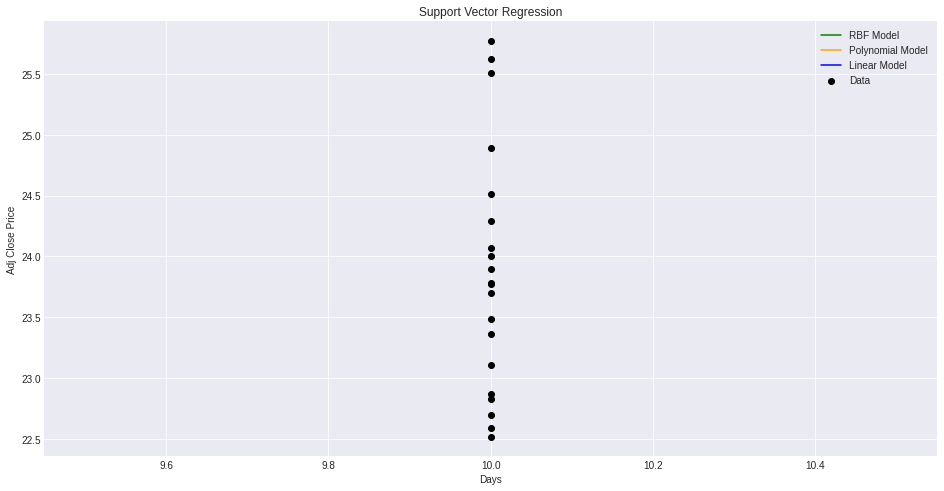

In [14]:
#Plot the models on a graph to see which has the best fit
plt.figure(figsize=(16,8))
plt.scatter(days, adj_close_prices, color = 'black', label='Data')
plt.plot(days, rbf_svr.predict(days), color = 'green', label='RBF Model')
plt.plot(days, poly_svr.predict(days), color = 'orange', label='Polynomial Model')
plt.plot(days, lin_svr.predict(days), color = 'blue', label='Linear Model')
plt.xlabel('Days')
plt.ylabel('Adj Close Price')
plt.title('Support Vector Regression')
plt.legend()
plt.show()

In [15]:
day = [[30]]
print('The RBF SVR predicted:', rbf_svr.predict(day))
print('The Linear SVR predicted:', lin_svr.predict(day))
print('The Polynomial SVR predicted:', poly_svr.predict(day))
print('Preco atual',actual_price['Adj Close'][20])

The RBF SVR predicted: [23.8000005]
The Linear SVR predicted: [23.8000005]
The Polynomial SVR predicted: [23.8000005]
Preco atual 23.48
